In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from plots import *

sp.init_printing()
freqs = [f for f in np.random.standard_cauchy(11) if abs(f) < 10]
omega = [2+ f for f in freqs] + [1 - f for f in freqs] + [1]

from BondGraphTools import version
import BondGraphTools as bgt
assert version == "0.3.7"
scale = 2

from matplotlib.font_manager import FontProperties

def plot_graph(t, x):
    fontP = FontProperties()
    fontP.set_size('small')
    fig = plt.figure(figsize=(scale*4,scale*4))
    plt.plot(t,x)
    ax = fig.gca()
    ax.set_xlabel('t')
    ax.set_title(f"System response to {impulse}")
    ax.legend(
        [f"$x_{i}$" for i in range(len(x))],
        bbox_to_anchor=(1.,1.),
        loc=1,
        borderaxespad=0.,
        prop=fontP
    )
    return fig

def print_tree(bond_graph, pre=""):
    print(f"{pre}{bond_graph}")
    try:
        for component in reversed(bond_graph.components):
            if pre == "": print_tree(component, pre +"|-" )
            else: print_tree(component, pre +"-" )
    except AttributeError:
        pass

# On Emergence in Complex Physical Systems


https://github.com/peter-cudmore

&nbsp;

    Dr. Peter Cudmore.  
    Systems Biology Labratory,   
    The School of Chemical and Biomedical Engineering,  
    The University of Melbourne.  

Many problems in biology, physics and engineering involve predicting and controlling complex systems, loosely defined as interconnected system-of-systems. Such systems can exhibit a variety of interesting non-equilibrium features such as emergence and phase transitions, which result from mutual interactions between nonlinear subsystems. 

Modelling these systems is a task in-and-of itself, as systems can span many physical domains and evolve on multiple time scales. Nonetheless, one wishes to analyse the geometry of these models and relate both qualitative and quantitative insights back to the physical system.

<s>Beginning with the modelling and analysis of a coupled optomechanical systems, this talk presents some recent results concerning the existence and stability of emergent oscillations.</s> This forms the basis for a discussion of new directions in symbolic computational techniques for complex physical systems as a means to discuss emergence more generally.


## The problem with big systems is that they're _big_...

## Example: Human Metabolism

<center><img src="images/map.png" height=600px></center>

(Image courtesy of Human Metabolism map https://www.vmh.life )

# Example: Ecosystems

<center><img src="images/water_cycle.jpg" width=800px></center>

## Complex Physical Systems 

A dynamical system is said to be a _complex physical system_ when:
* It is made up of many _interacting_ parts, or subsystems (High-dimensional).
* The subsystems are not all of the same (Heterogenenous).
* The subsystems are complicated (Nonlinear and/or Noisy).
* There are well defined boundaries between the subsystems (Network Topology).
* **Coupling takes place via resource exchange (Conservation Laws).**


> There is a fact, or if you wish, a law, governing all natural phenomena that are known to date. There is no known exception to this law—it is exact so far as we know. The law is called the conservation of energy. 

\- R. Feynman, 1963. http://www.feynmanlectures.caltech.edu/I_04.html

## Complex Systems can exhibit _emergence_.

- _Emergence_ is a phenomenom where the system displays novel new behaviour that could not be produced by individuals alone.
- _Synchronisation_ is the most studied example of emergence, and can occur in systems of coupled oscillator.

<center><b><i> How can one predict and control emergent phenomenon?</i></b></center>

## The problem with big systems...

$$\begin{align}
\dot{x} &= f(x, u;\lambda),\\
0 &= g(x,u;\lambda),\\
 y &= h(x,u).
\end{align}
$$

What do we do when $x$ is high dimensional and $f$ doesn't have exploitable structure?

![the connectome](images/connectome.jpg)

<center><b><i>
How can nonlinear dynamics be "scaled up"?   
</i></b></center>

## Geometry and Physics

Geometric features often correspond to physically interesting features (Noether Theroem).


In systems biology in particular:
- Conserved Moieties $\iff$ first integrals 
- Transport pathways $\iff$ invariant manifolds.

![](images/phys2geo.svg)

<center><b><i>
How can nonlinear dynamics be "scaled up"?   
</i></b></center>

## Goals of this talk

I want to convince you that:
1. Emergence is a nonlinear phenomenon, so we need to look at _nonlinear_ systems.
2. As systems get big, the usual ad-hoc techniques stop working so we need an alternative.
3. Thinking about energy provides a means to _systematically_ model systems.
4. Symbolic modelling software makes this scalable.
5. This provides a pathway to study system level dynamics, in particular emergence.

## Outline of this talk


![The Goal](images/Sydney.svg)

1. Briefly discuss synchronisation as it's the best example of emergence.

2. Discuss some challenges and present solutions for modelling big systems.

3. Discuss software to make this work.

## Part 1: Synchronisation as the prototype for emergence

## The Kuramoto Model

_Self-entrainment of a population of coupled non-linear oscillators_ Kuramoto, Y. (1975).

$$
\text{limit cycle oscillator:}\qquad \dot{z_j} = \gamma(1 - |z_j|^2)z_j + i\omega_j z_j + \frac{K}{n}\sum_{k=1}^nz_k,
\quad j=1,\ldots n, \qquad \gamma \gg 1, 0 \le K, \omega_j \in \mathbb{R}
$$

The phase $\theta_j =\text{Arg}\ z_j$ of each oscillator with a natural frequency $\omega_j$ is given by

\begin{equation}
\dot{\theta}_j =  \omega_j + \frac{K}{n}\sum_{k=1}^n\sin(\theta_k - \theta_j),\qquad j=1,\ldots n
\end{equation}
- When $0\le K <K_c $ each oscillator rotates at their own frequency.

- A Hopf bifurcation occurs at $K=K_c$ creating collective motion.

- When $K>K_c$ more oscillator are recruited to collective.

The value of $K_c$ depends upon the distribution of $\{\omega_j\}$. For symmetric distribtuions we have
$$K_c = \frac{2}{\pi g(0)}$$


<IPython.core.display.Javascript object>


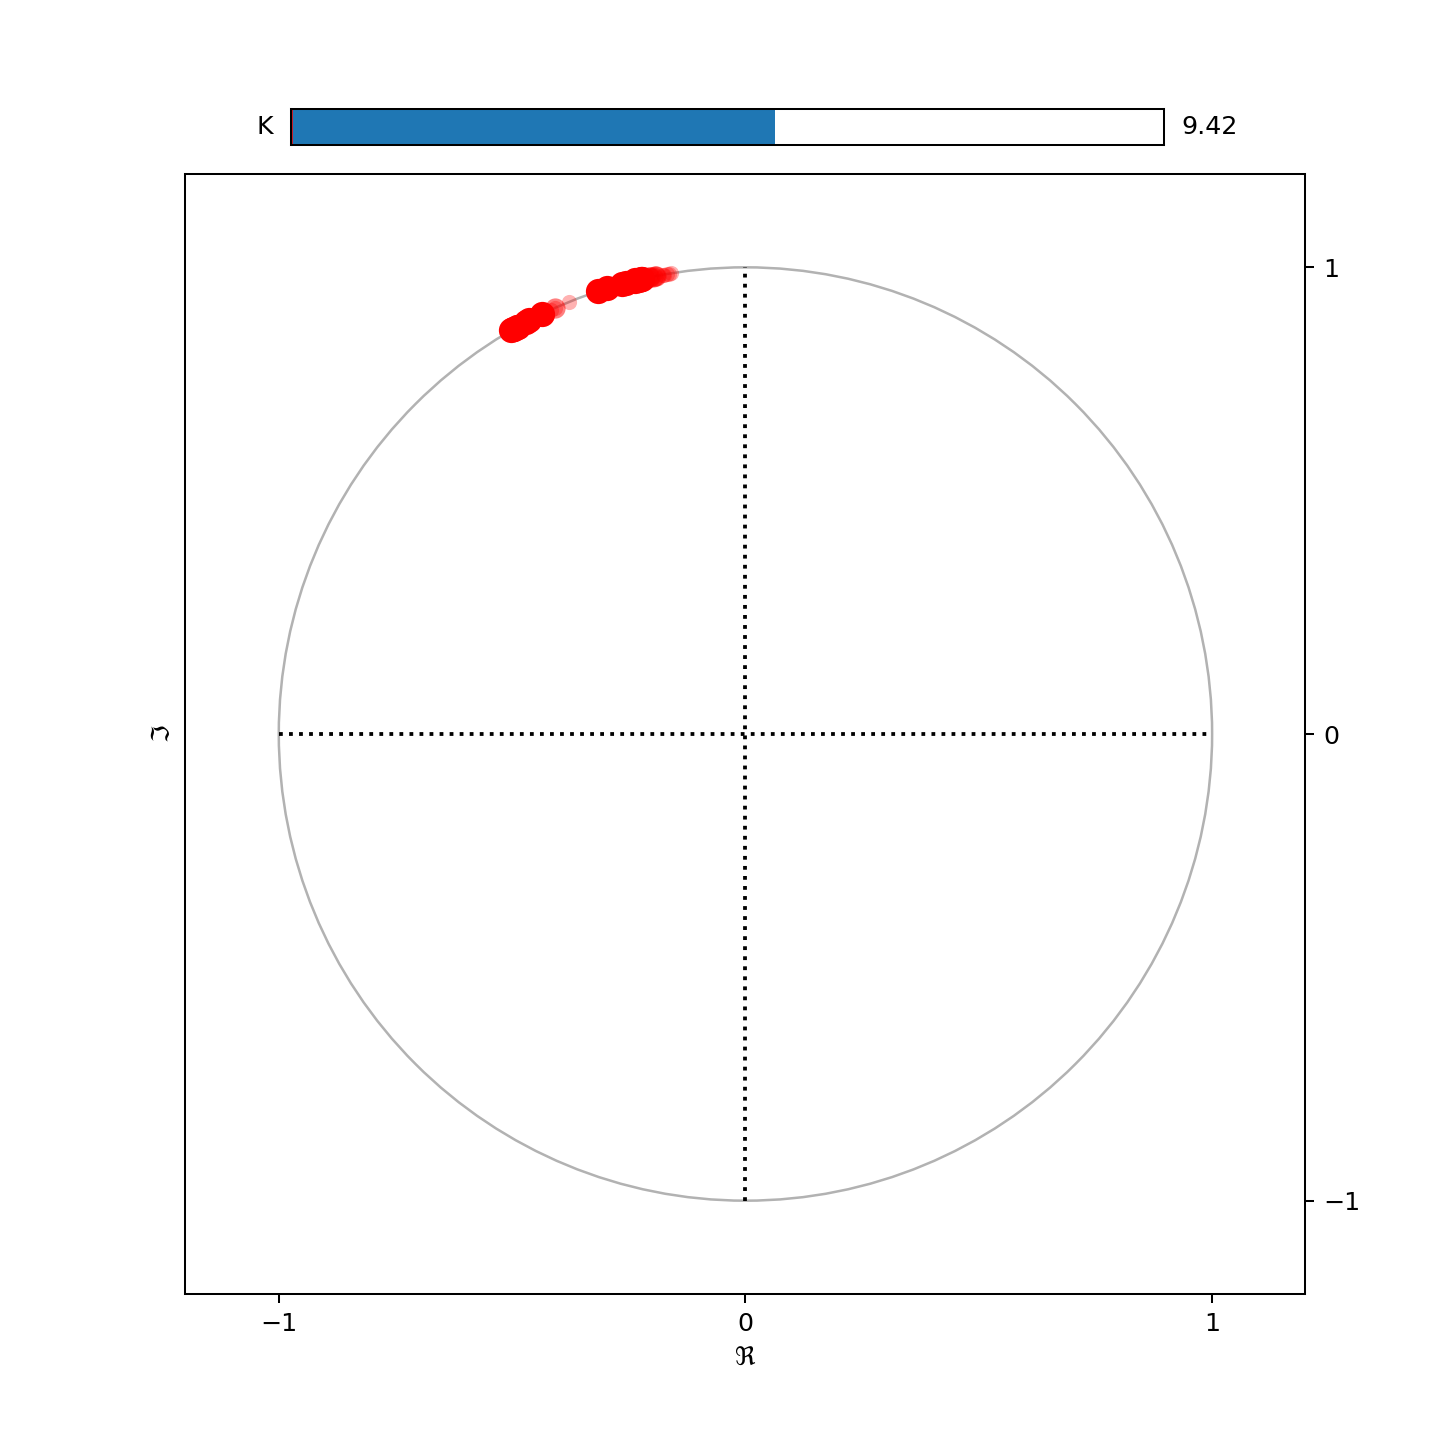

In [2]:
# Omega = Cauchy(2,1) so that K_c = 2
p = KuramotoModel(omega=omega, scale=scale)
plt.show()

Points:
- Wiener -> Winfree -> Kuramoto
- Comes from studying BZ reaction
- Motion on a strongly attracive limit cycle (invariant manifold) such that coupling
- All-to-all coupling on a complete graph.
- sinusoidal in phase -> linear in complex co-ordinates.
- Kuramoto showed that at $K_c=2$ a Hopf bifurcation creates a synchronised state, that becomes progressive more stable as $K_c$ increases.

## The Kuramoto Model (Cont.)

$$
\text{limit cycle oscillator:}\qquad \dot{z_j} = \gamma(1 - |z_j|^2)z_j + i\omega_j z_j + \frac{K}{n}\sum_{k=1}^nz_k,
\quad j=1,\ldots n, \qquad \gamma \gg 1, 0 \le K, \omega_j \in \mathbb{R}
$$

Kuramoto introduced an 'order parameter' $r$ to measure phase coherence
\begin{equation}
z = r\mathrm{e}^{\mathrm{i}\Theta} = \frac{1}{n}\sum_{k=1}^n \exp{\mathrm{i}\theta_k} \implies r = \frac{1}{n}\sum_{k=1}^n \exp\mathrm{i}(\theta_k-\Theta)
\end{equation}
It follows that
$$
\Im\left[\frac{1}{n}\sum_{k=1}^n\exp i(\theta_k - \theta_j)\right] = 
\Im\left[r\exp i(\Theta - \theta_j)\right] 
$$


Hence
$$
\dot{\theta}_j =  \omega_j + \frac{K}{n}\sum_{k=1}^n\sin(\theta_k - \theta_j)$$

becomes 
$$
\dot{\theta}_j =  \omega_j + rK\sin(\Theta - \theta_j).
$$

<IPython.core.display.Javascript object>


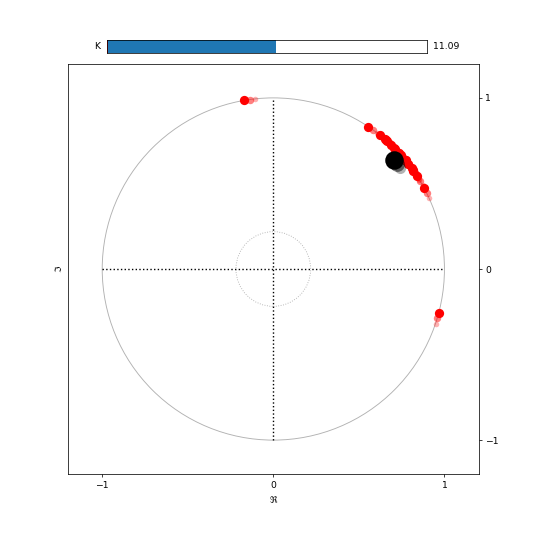

In [5]:
p = KuramotoOrderModel(omega,scale=scale)
plt.show()

Points:
- Mean phase is a kind of coordinate for the synchronous manifold.
- Weak interactions with entire populations <=> strong coupling to collective statistics
- Feedback look means that if coupling increases coherence, then $r$ increases asymptotically to $r_\infty = \sqrt{1-K_c/K}$$.

## The Status of the Kuramoto Model 

$$
\dot{\theta}_j =  \omega_j + rK\sin(\Theta - \theta_j),\qquad j = 1,\ldots n.\qquad r = \frac{1}{n}\sum_{k=1}^n \exp i (\theta_k - \Theta).
$$

- Identical oscillators evolve on a 3 dimensional manifold (Watanabe and Strogatz, Physica D 1994. Ott and Antonsen, Chaos 2008).
- Heterogenous oscillator dynamics represented in terms of collective co-ordinates in the thermodynamic limit (Pikovsky and Rosenblum, Physica D, 2011) and for finite-n (Gottwald, Chaos 2015).
- Active research into applications in biology (particuarly neuroscience), physics and chemsitry.
- Extensions to noisy, graph coupled and with various different coupling mechanisms.
- Very few global results for heterogenous oscillators (Dietert, J. Math. Pures Appl. 2016).
- _No results as yet for geometrical interpretation of transtion to synchrony._

## Implications

#### From the Kuramoto Model

$$
\dot{\theta}_j =  \omega_j + rK\sin(\Theta - \theta_j),\qquad j = 1,\ldots n.\qquad r = \frac{1}{n}\sum_{k=1}^n \exp i (\theta_k - \Theta).
$$
1. When thinking about emergence, we want to think about mutual coupling between population statistics and individuals.
2. This means that, for a given system, we need to understand both mechanisms on the individual scale _and_ dynamics on the population scale.

#### For complex physical systems

1. We expect to see mutual coupling between the population, particularly via resource competition.
2. Statistical approaches (like stat-mech) will not be suffient for our purposes.


<center><b><i> In order to look at emergence more generally, we must be able to model nonlinear systems more generally </i></b></center>

&nbsp;  

&nbsp;  

&nbsp;  


# Modelling Complex Physical Systems 

&nbsp;

### Inheritance, Composition and Encapsulation

## Ad-hoc modelling.

![Optomechanial experiment](images/experiment.svg)

1. Start with a Hamiltonian
2. Derive equations of motion and do a whole bunch of algebra.
3. Work out the appropriate coordinates (here, a non-standard slow fast system)
4. More algebra to reduce model.
5. Investigate the dynamics of the reduced models.
6. Relate results in reduced model to observables in the original system

In the case of emergent phenomenon, the 'reduced' subspace involves the whole (or at least a large part of) system. E.g. mean fields.

## Ad-hoc approaches won't scale.

<center> <img src="images/map.png"> </center>

As an example:
- individual processes are far more heterogenous
- network topolgy is complicated
- many parameters are unknown
- almost guaranteed to be a differential-algebraic system
- **too big for one person, or even one lab**

We must have:
- Ways to respresent and manipulate such systems,
- Ways to manage congnitive complexity,
- Ways to automate model capture and reduction,
- Ways to effective share work between researchers

## Energetic Network Modelling

![Optomechanial experiment](images/experiment.svg)

![Cavity_network](images/cavity_network-01.svg)

## The Structure of Complex Physical Systems

An approach based on 'bond graph' modelling, and port-Hamiltonian systems.

- Energy is stored in 'state variables' $q,p$
- Power is distributed via 'power variables' $e,f$
- Formally describes the hyrdo-mechanical-electrical analogies.

For example; 
- Dissipation $R$ relates $e,f$ variables. (eg. Ohm's law, friction, etc)
- Potential storage $q$ to $e$ (eg, capacitors, gravity) 

**Translational Mechanics**
- $q, p$ are position and momentum
- $f, e$ are velocity and force

**Electromagnetics**

- $q, p$ are charge and flux linkage
- $f, e$ are current and voltage

**Hydraulics**
- $q, p$ are volume and pressure momentum
- $f, e$ are fow and pressure

**Chemistry**
- $q,p $ is moles and.. chemical momentum?
- $f,e$ are molar flow and  chemical potential


## An Object Oriented Representation of Energetic Systems

Object Oriented Programming (OOP) is a software development paradigm that seeks to manage large, complicated projects by breaking problems into _data_ plus _methods_ that act on the data. 

Three big ideas in OOP are:
1. _Inheritance_ or is-a relationships. 
2. _Composition_ or has-a relationships.
3. _Encapsulation_ or infomation hiding.

This allows for _hierarchical_ and _modular_ design which reduces model complexity.

'Energetic systems' draws from:
- Network based analysis from engineering; in particular circuit analysis and the more general (and less well known) bond graph methodology,
- Classical mechanics, and in particular recent advances in port based Hamiltonian mechanics,
- The effective was of managing complexity within software engineering.

All in service of describing _whole systems_ so as to understand _emergent processes_.

## Inheritance

&nbsp;

For networked dynamic systems, _inheritance_ means we:
- define what the base components are,
- impose conditions on the dynamical sub-systems,
- describe the interface between nodes.


![Inheritance](images/inheritance.svg)

### Definition (Energetic System)

An energetic system is a tuple $(M, \mathcal{D}, U,\Phi)$
where the
* *state space* $M$ is a manifold of $\dim(M) = m\ge 0$
* *port space* $\mathcal{D} \subset \mathcal{F} \times \mathcal{E}$ where, $\mathcal{E} = \mathcal{F}^*$ and $ \dim{\mathcal{D}} = \mathcal{F}|_\mathcal{D} =n$. 
* *control space* $U \subset C^r:\mathbb{R}_+ \rightarrow \mathbb{R^k}$ with $k\ge 0$ 
* *constitutive relation* is a smooth map $\Phi: TM \times \mathcal{D} \times U\times\mathbb{R}_+ \rightarrow
  \mathbb{R}^{m+n}$  
    such that
  $$\Phi\left(\frac{dx}{dt},x,f,e,u,t\right)=0.$$

$\Phi$ relates the _internal state_ $M$ and the _external environment_ (via $\mathcal{D}$).

&nbsp;

![Energetic System](images/EnergeticSystems.svg)


&nbsp;

The incoming *power* is $P_\text{in} = \left<e,f\right>$ for $(f,e)\in \mathcal{D}$

## Energy Storage

**Example (Potential Energy)**

Potential energy storage can be defined as

$$
\Phi_\text{C}(\dot{x},e,f,x) = 
\left(\begin{matrix}
x - Ce\\ 
\dot{x} - f
\end{matrix}\right) = 0.
$$

**Example (Kinetic Energy)**

Simiarly for generalised 'kinetic energy'

$$
\Phi_\text{L}(\dot{x},e,f,x) = 
\left(\begin{matrix}
x - Lf\\ 
\dot{x} - e
\end{matrix}\right) = 0.
$$




&nbsp;

![Energetic System](images/EnergeticSystems.svg)



## Port-Hamiltonains

One can show that for conservative systems, one can define a storage function $H(x)$ and choose    

$$\Phi(\dot{x}, x, f,e,t) = 
\left(\begin{matrix}
\dot{x} - f\\
e - \nabla_x H(x)
\end{matrix}\right) = 0.$$

To recover Hamiltons equations, one must additionally connect ports $(e,f)_i$ to $(e,f)_j$, and hence impose a particular _Dirac structure_ on $\mathcal{D}$.

**Example (Harmonic Oscillator Part 1)**
Given the storage function

$$H(x) = \frac{\omega}{2}(x_1^2 + x_2^2)$$ 

we have

$$\Phi(\dot{x},e,f,x) = (e_1 - \omega x_1, f_1-\dot{x}_1, e_2-\omega x_2, f_2-\dot{x}_2) =  0.$$



&nbsp;

![Energetic System](images/EnergeticSystems.svg)



# Connecting Ports

Two ports can be connected with via a _Dirac structure_

**Example (Common Effort Bond)**

A common _effort_ or force connection is simply the power conserving relation $e_1 =e_2$ and $f_1 = -f_2$.  

This can be interpreted as   

$$
\Phi_\text{Bond}(e,f) = \left(e_1 - e_2, f_1 + f_2\right) = 0
$$





&nbsp;

![Energetic System](images/EnergeticSystems.svg)



## Conservation Laws

**Example (0 Junction)**

One can define 'conservation of mass' (equally Kirchoffs voltage law) as 

$$
\Phi(e,f) 
=
\left(\begin{matrix}
e_1 - e_2\\
\vdots\\
e_1 - e_{n}\\
\sum_{k=1}^n f_n
\end{matrix}\right) = 0.$$

one can easily check that this implies

$$
P_\text{in} = \sum_{k=1}^n e_kf_k = 0.
$$

This is called the 'zero junction' for historical reasons...


&nbsp;


&nbsp;

![Energetic System](images/EnergeticSystems.svg)


## Dissipation

**Example (Dissipation)**

Linear Dissipation has no state and relates effort $e$ to flow $f$:

$$ \Phi_\text{R}(e,f) = 
e_1 - Rf_1 =0$$

such that the power entering the subsystem

$$P_\text{in} = e_1f_1 = R (f_1)^2 \ge 0$$

is always positive, hence dissipation.


&nbsp;


&nbsp;

![Energetic System](images/EnergeticSystems.svg)



## Inheritance

For energetic systems:

### Nodes are particular _energetic systems_ 
Each node is described by a set of differential-algebraic equations $\Phi(\dot{x},x,e,f) = 0$.

### Edges are constraints on port variables.

An edge represents how state is shared between systems.

![Inheritance](images/inheritance.svg)

## Composition

&nbsp;

For networked dynamic systems _composition_ means that we can replace nodes with subgraphs and vice-versa.

![Composition](images/composition.svg)

## Corollary (Composition)
If $\Psi_1 = (M_1, \mathcal{D}_1, U_1,\Phi_1)$ and $\Psi_2 = (M_2, \mathcal{D}_2, U_2,\Phi_2)$  are energetic systems, then 

$$\begin{eqnarray}\Psi_0 &=& \Psi_1 \oplus\Psi_2\\
&=& 
\left(M_1\oplus M_2,\mathcal{D}_1 \oplus\mathcal{D}_2,U_1\oplus U_2, \Phi_1\oplus\Phi_2\right)
\end{eqnarray}$$
is also an energetic system.

Suppose (abusing notation) $\Psi_0 = (\Psi_1,\Psi_2)$ is an energetic system with ports 

$$(e_i, f_i) \in \mathcal{D}_1, \quad (e_j,f_j)  \in \mathcal{D}_2$$

Then $\Phi_0$ with the additional power conserving constraint 

$$e_i - e_j = 0\qquad f_i+f_j=0$$

is also a energetic system

![Composition](images/composition.svg)

## Encapsulation

&nbsp;

For a networked dynamical system _encapsulation_ means that we can apply simplification methods to a subgraph so that the replacement system is less complicated, while representing the same behaviour.

&nbsp;

One can also go the other way by replacing a node with a more complicated subgraph.

![Encapsulation](images/encapsulation.svg)

# Example: Linear Damped Harmonic Motion

Consider the following __nodes__
$$
\Phi_\text{C}= 
\left(\begin{matrix}
x_c - Ce_c\\ 
\dot{x}_c - f_c
\end{matrix}\right)
$$

$$
\Phi_\text{L} = 
\left(\begin{matrix}
x_L - Lf_L\\ 
\dot{x}_L - e_L
\end{matrix}\right)
$$

$$ \Phi_\text{R} = 
(e_R - Rf_R)$$

$$
\Phi_\text{0}
=
\left(\begin{matrix}
e_1 - e_2\\
e_1 - e_3\\
e_1 - e_\text{port}\\
f_1+f_2+f_3 + f_\text{port}
\end{matrix}\right)$$

Withthe __edges__ as power connections:

$$P_1 = P_c,\qquad P_2 = P_L\qquad P_3 =  P_R.$$

Recall $P_1 = P_c$ implies 
$$e_1 = e_c\qquad f_1 = -f_c$$

Since $\Phi_0$ implies $e$ are equal
$$
e_\text{port} = \frac{1}{C}x_c = \dot{x}_L = rf_R
$$
and the 'flow' sum gives
$$
f_\text{port} = \dot{x}_c + \frac{1}{RC}x_c +\frac{1}{L}x_L 
$$

If there is no flow allowed through $f_\text{port}$, then we have the usual equation for damped harmonic motion.

- It is not difficult to extend this to nonlinaer $\Phi$
- _Most of the heavy lifting can be done via linear algebra_

## Object Oriented Modelling and Energetic Systems

Energetic systems provide:
- _Inheritance_; an abstract base representation of energetic systems.
- _Composition_; a way to hierarchically compose systems of systems.
- _Encapsulation_; a framework inside which simplifications can occur.

<center><b><i>By systematically modelling physical systems, we can begin to understand system dynamics, and hence emergence.</i></b></center>

&nbsp;  

&nbsp;  

&nbsp;  

# `BondGraphTools`

## `BondGraphTools`: a `python` library for energetic systems.

`BondGraphTools` (https://github.com/BondGraphTools) a framework for modelling energetic systems.
* Based upon an extension of bond graph and port-Hamiltonian modelling.
* Provies a simple, *minimal* object-oriented interface for constructing models.
* Implemented in `python` and uses the standard `scipy` stack.
* Performs symbolic model reduction and simulation.
* Simulations with DAE solvers in `julia`.
* Developed with sustainable software practices.
* Intended to be used in _conjunction_ with other tools.

'Bond Graphs' are a multi-domain port-based graphical modelling technique used predominantly in mechatronics.  
Port-Hamiltonian systems integrate geometric approaches from classical mechanics and control theory with port based modelling.  

## `BondGraphTools`  is an API for modelling energetic systems

&nbsp;

<center><b><i>Hence modelling a complex physical system is equivalent to writing code</i></b></center>

## Example: Linear Oscillator

In [4]:
class Linear_Osc(bgt.BondGraph):  
    damping_rate = 0.1 #D amping rate common across oscillator array
    
    def __init__(self, freq, index):
        """Linear Oscillator Class

        Args:
            freq:  Natural (undamped) frequency of this oscillator
            index: Oscillator number (used for naming).
 
        Instances of this class are bond graph models of externally forced
        damped harmonic oscillators.        
        In the electrical analogy, these is simply an open loop series RLC  
        circuit."""
	
        # Create the components
        r = bgt.new("R", name="R", value=self.damping_rate)
        l = bgt.new("I", name="L", value=1/freq)
        c = bgt.new("C", name="C", value=1/freq)
        port = bgt.new("SS")
        conservation_law = bgt.new("1")
	
        # Create the composite model and add the components
        super().__init__(
            name=f"Osc_{index}",
            components=(r, l, c, port, conservation_law)
        )
	
        # Wire the model up
        for component in (r,l,c):
            bgt.connect(conservation_law, component)
        bgt.connect(port, conservation_law)
        
        # Expose the SS component as an external port
        bgt.expose(port, label="P_in")

`Linear_Osc` 
- _inherits_ from BondGraph, which is a base 'class' containing much of functionality
- is _composed_ of a variety of subcomponents
- _encapsulates_ a one port RLC component.


In [5]:
example_osc = Linear_Osc(1000,1)
example_osc.constitutive_relations                        

## Automating Model Capture

In [6]:
from BondGraphTools.reaction_builder import Reaction_Network

TCA_reactions = {
    "Citrate synthase": 
        ["acetyl-CoA + oxaloacetate + H2O = citrate + CoA-SH"],
    "Aconitase": 
        ["Citrate = cis-Aconitate + H2O", "cis-Aconitate + H2O = Isocitrate"],
    "Isocitrate dehydrogenase": 
        ["Isocitrate + NAD = Oxalosuccinate + NADH + H", 
         "Oxalosuccinate = a-Ketoglutarate + CO2" ],
    "a-Ketoglutarate dehydrogenase": 
        ["a-Ketoglutarate + NAD + CoA-SH = Succinyl-CoA + NADH + H + CO2"],
     "Succinyl-CoA synthetase":  
        ["Succinyl-CoA + ADP + Pi = Succinate + CoA-SH + ATP"],
     "Succinate dehydrogenase": 
        ["Succinate + Q = Fumarate + QH2"],
     "Fumarase":
        ["Fumarate + H2O = L-Malate"],
     "Malate dehydrogenase":
        ["L-Malate + NAD = Oxaloacetate + NADH + H"]
} 

def TCA_Cycle():
    reaction_net = Reaction_Network(name="TCA_Cycle")
    for enzyme in TCA_reactions:
        for index, reaction in enumerate(TCA_reactions[enzyme]):
            reaction_name = f"{enzyme} - {index}"
            reaction_net.add_reaction(reaction,  name=reaction_name)
    return reaction_net 

In [7]:
tca_bg = TCA_Cycle().as_network_model()
tca_bg.constitutive_relations

## Constructing big models with BondGraphTools.
1. Define the _nodes_ (processes that act on energy).
2. Define the _edges_ (the 'power ports', or shared variables).
3. Feed this into `BondGraphTools`.
4. ...?
5. Profit! (Use the resulting equations of motion for whatever you want). 


<IPython.core.display.Javascript object>


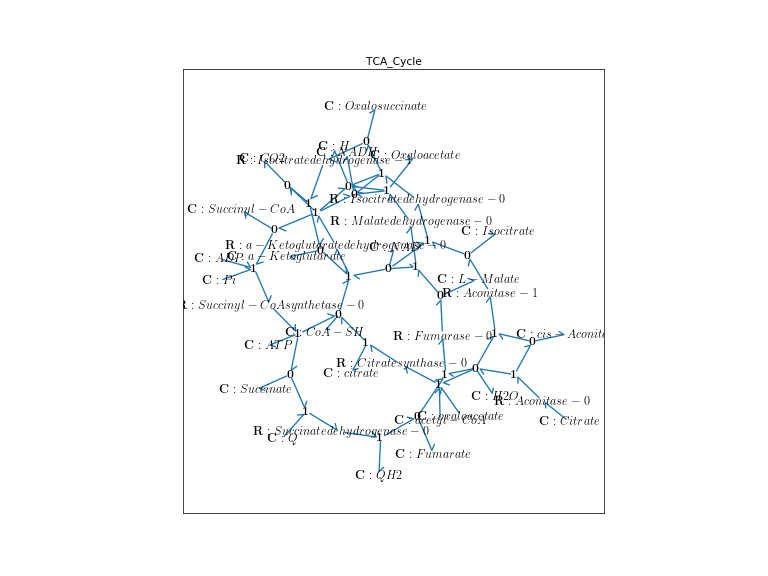

<IPython.core.display.Javascript object>


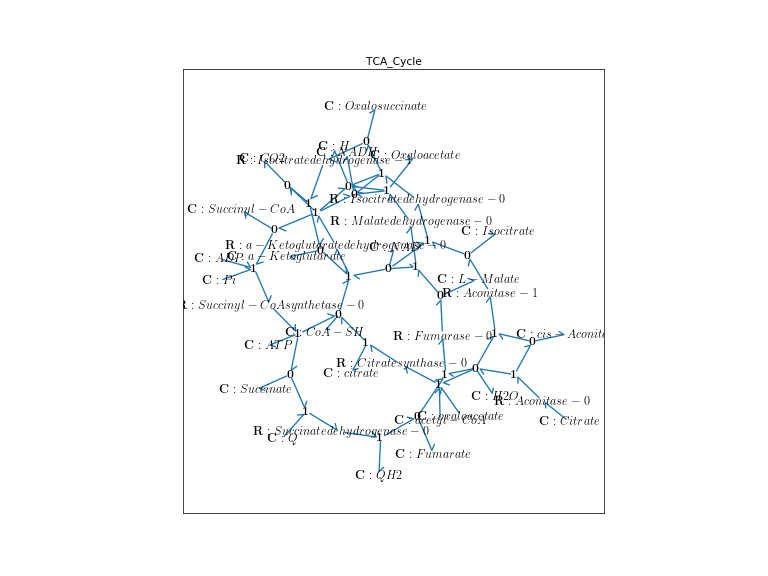

In [13]:
bgt.draw(tca_bg)
plt.show()


## State of `BondGraphTools`

Current Status:
- In active development (v.0.3.7) and active use within the lab.
- Documentation at https://bondgraphtools.readthedocs.io/en/latest/
- Available on PyPI https://pypi.org/project/BondGraphTools/
- Source on GitHub https://github.com/BondGraphTools/BondGraphTools
- Manuscript in preparation.

### Planned Future Developments
- Extraction of first integrals and invariant manifolds.
- Robust parameter and control value network.
- Interface for measuring port space.
- Algorithmic model reduction (particularly manifold reductions).
- Bifurcation analysis (particularly fixed point tracking).

# In Summary

- Energetic Modelling gives us a framework to systematically desrcibe complex physical systems.

- `BondGraphTools` provides a way to build and recude big model in symbolic form.


- The resutls can feed into algorithmic model reduction, parameter estimation and sensitivity analysis.

# Thank You!

Thanks to
- Vera, Amadine and Gary
- The University of New South Wales
- Prof. Edmund Crampin, Prof. Peter Gawthrop, Michael Pan.
- The Systems Biology Lab at The University of Melbourne

<table >
    <tr style="background-color:#FFFFFF;">
        <td><img src="images/PRIMARY_A_Vertical_Housed_RGB.png" alt="University of Melbourne" width=50% align="center"></td>
        <td><img src="images/cbns-logo.png" alt="ARC CEnter of Excellence in Convergent Bio-Nano Science and Technology" width=100% align="center"></td>
    </tr>
</table>

&nbsp;

&nbsp;

# Please check out `BondGraphTools`

# https://github.com/BondGraphTools/

In [15]:
print_tree(tca_bg)

BG: TCA_Cycle
|-1: OxaloacetateNADHH
|-1: L-MalateNAD
|-R: Malate dehydrogenase - 0
|-1: FumarateH2O
|-R: Fumarase - 0
|-1: FumarateQH2
|-1: SuccinateQ
|-R: Succinate dehydrogenase - 0
|-1: SuccinateCoA-SHATP
|-1: Succinyl-CoAADPPi
|-R: Succinyl-CoA synthetase - 0
|-1: Succinyl-CoANADHHCO2
|-1: a-KetoglutarateNADCoA-SH
|-R: a-Ketoglutarate dehydrogenase - 0
|-1: a-KetoglutarateCO2
|-R: Isocitrate dehydrogenase - 1
|-1: OxalosuccinateNADHH
|-1: IsocitrateNAD
|-R: Isocitrate dehydrogenase - 0
|-1: cis-AconitateH2O
|-R: Aconitase - 1
|-1: cis-AconitateH2O
|-R: Aconitase - 0
|-1: citrateCoA-SH
|-1: acetyl-CoAoxaloacetateH2O
|-R: Citrate synthase - 0
|-C: Oxaloacetate
|-0: L-Malate
|-C: L-Malate
|-C: QH2
|-0: Fumarate
|-C: Fumarate
|-C: Q
|-C: ATP
|-0: Succinate
|-C: Succinate
|-C: Pi
|-C: ADP
|-0: Succinyl-CoA
|-C: Succinyl-CoA
|-0: CO2
|-C: CO2
|-0: a-Ketoglutarate
|-C: a-Ketoglutarate
|-0: H
|-C: H
|-0: NADH
|-C: NADH
|-0: Oxalosuccinate
|-C: Oxalosuccinate
|-0: NAD
|-C: NAD
|-0: Isocitr